# Summary
In this notebook we construct a combined model, that is expecting a 12-leads ECG readings, first impute their empty values (using the upstream model's weights) and then takes the imputed ECG signal and use it to predict the target(s).  
We do not train anything yet.

# Setup

In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

In [2]:
def get_best_model(folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads'):
    """
    Since that in the upstream stage we save basically every model, it is important to 
    take the one that minimized the loss over the validation set.
    """
    model_files = [x for x in os.listdir(folder_path) if model_name in x and 'loss' not in x]

    # get timestemps
    timestemps = [float(x.replace('transformer_cnn_4heads_', '').replace('.pt','')) for x in model_files]
    timestemps.sort()

    # get best model (the last one that has been saved)
    best_model_path = folder_path+model_name+'_'+str(timestemps[-1])+'.pt'
    return best_model_path
best_model_path = get_best_model(folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')

In [3]:
import torch

# hyperparams to be changed if needed
downstream_path = './downstream_classification/models/3.0-inception-bs128-balanced-death-lr0.001-decay0-aucpr-weighted33.pt'
upstream_path = best_model_path

## upstream
input_dimension          = 12
output_dimension         = 12
hidden_dimmension        = 128
attention_heads          = 4
encoder_number_of_layers = 8
dim_feedforward          = 512
kernel_size              = 3
activation               ='gelu'
dropout                  = 0.4
# ---------------

device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda
Starting Experiment


training using device: cuda


Num attention heads: 1
1320081


Within epoch loss (validation) 3.98408: 100%|██████████| 832/832 [01:27<00:00,  9.47it/s]
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/sea

New best validation loss was found, current best valid loss is 3.9841


/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

---------------------------------------------
Epoch: 01 | Time: 9m 31s
	Train Loss: 4.288
	 Val. Loss: 3.984
	 ROC-AUC: 0.624
	 PR-AUC: 0.043
	 TPR for FPR=0.6 Budget: 0.746
	 Best Val. Loss: 3.984
---------------------------------------------


Within epoch loss (validation) 3.98634: 100%|██████████| 832/832 [01:26<00:00,  9.63it/s]


---------------------------------------------
Epoch: 02 | Time: 9m 37s
	Train Loss: 4.227
	 Val. Loss: 3.986
	 ROC-AUC: 0.628
	 PR-AUC: 0.045
	 TPR for FPR=0.6 Budget: 0.752
	 Best Val. Loss: 3.984
---------------------------------------------


Within epoch loss (validation) 3.98994: 100%|██████████| 832/832 [01:25<00:00,  9.74it/s]


---------------------------------------------
Epoch: 03 | Time: 9m 30s
	Train Loss: 4.192
	 Val. Loss: 3.990
	 ROC-AUC: 0.635
	 PR-AUC: 0.047
	 TPR for FPR=0.6 Budget: 0.751
	 Best Val. Loss: 3.984
---------------------------------------------


Within epoch loss (validation) 4.02045: 100%|██████████| 832/832 [01:25<00:00,  9.78it/s]


---------------------------------------------
Epoch: 04 | Time: 9m 30s
	Train Loss: 4.155
	 Val. Loss: 4.020
	 ROC-AUC: 0.636
	 PR-AUC: 0.047
	 TPR for FPR=0.6 Budget: 0.763
	 Best Val. Loss: 3.984
---------------------------------------------


Within epoch loss (validation) 4.03554: 100%|██████████| 832/832 [01:25<00:00,  9.72it/s]


---------------------------------------------
Epoch: 05 | Time: 9m 27s
	Train Loss: 4.127
	 Val. Loss: 4.036
	 ROC-AUC: 0.631
	 PR-AUC: 0.046
	 TPR for FPR=0.6 Budget: 0.747
	 Best Val. Loss: 3.984
---------------------------------------------


Within epoch loss (validation) 4.09536: 100%|██████████| 832/832 [01:27<00:00,  9.54it/s]


---------------------------------------------
Epoch: 06 | Time: 9m 56s
	Train Loss: 4.103
	 Val. Loss: 4.095
	 ROC-AUC: 0.636
	 PR-AUC: 0.046
	 TPR for FPR=0.6 Budget: 0.762
	 Best Val. Loss: 3.984
---------------------------------------------


Within epoch loss (training) 4.05484:  78%|███████▊  | 3198/4103 [06:29<01:50,  8.21it/s]  


KeyboardInterrupt: 

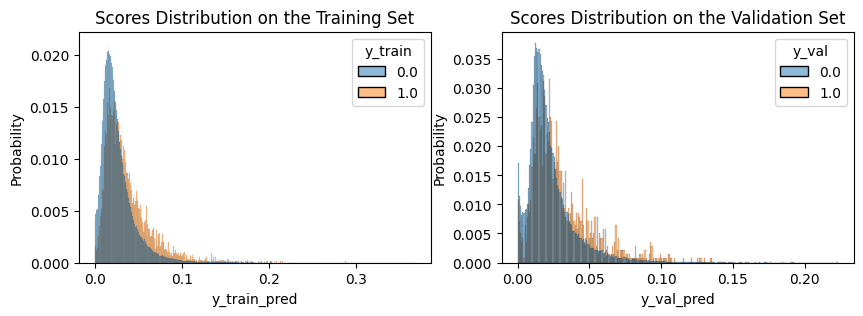

In [4]:
from combined_downstream_upstram.executors.train_on_local_machine_mps import trainer

for lr in [0.0005,0.001,0.003]:
    for class_weight in [33,50,66,100]:
        for weight_decay in [0,0.0001,0.0005,0.001]:
            loss_function_weight = torch.tensor([class_weight]).to(device)
            config = {
                # general
                'seed': 123,
                'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
                'data_folder_path': './downstream_classification/data/individual-signals/',
                'fillna': 0,
                # training
                'batch_size': 64,
                'n_epochs': 60,
                'clip':1,
                'loss_function_weight':loss_function_weight,
                'targets': ['one_year_until_death'],
                'saving_path': f'./combined_downstream_upstram/models/comined_model_training/comined_model_training_{lr}_{class_weight}_{weight_decay}',
                'lr': lr,
                'impute_only_missing':True,
                'weight_decay':weight_decay,
                'patience':5
            }

            import os

            # run
            print('Starting Experiment')
            trainer(**config)


In [ ]:
print('finished')

finished
